In [289]:
# Importing the relevant libraries
import numpy as p
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [77]:
# Loading the dataset
df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Data Dictionary

- country: Name of Country
- exports: Exports of goods and services per capita. Given as percentage of the GDP per capita
- Imports: Imports of goods and services per capita. Given as percentage of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.
- life_expec: The average number of years a newborn child would live if the current mortality patterns are to remain the same
- child_mort: Death of children under 5 years of age per 1000 live births
- health: Total health spending per capita. Given as percentage of GDP per capita
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

In [79]:
# Investigating the data type and confirming if there are missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<Axes: >

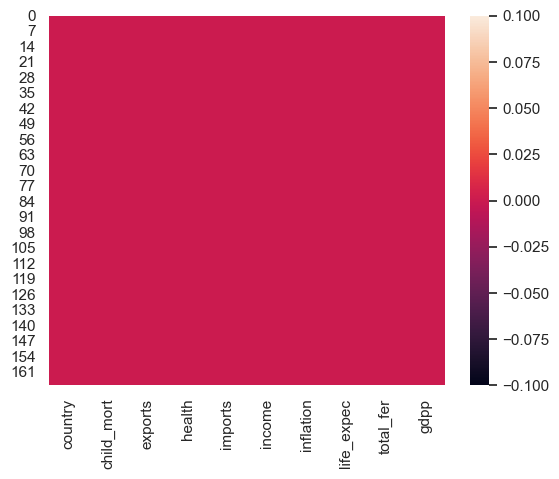

In [81]:
# Visualizing the missing values
sns.heatmap(df.isnull())

We are clear there are no missing values

In [84]:
# Checking for duplicated
df.duplicated().sum()

0

The above showed there are also no duplicate values

In [87]:
# checking the data statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The data statistics shows much variation between the mean and the median values suggesting the presence of outliers

Text(0.5, 1.0, 'Boxplot Showing gdpp')

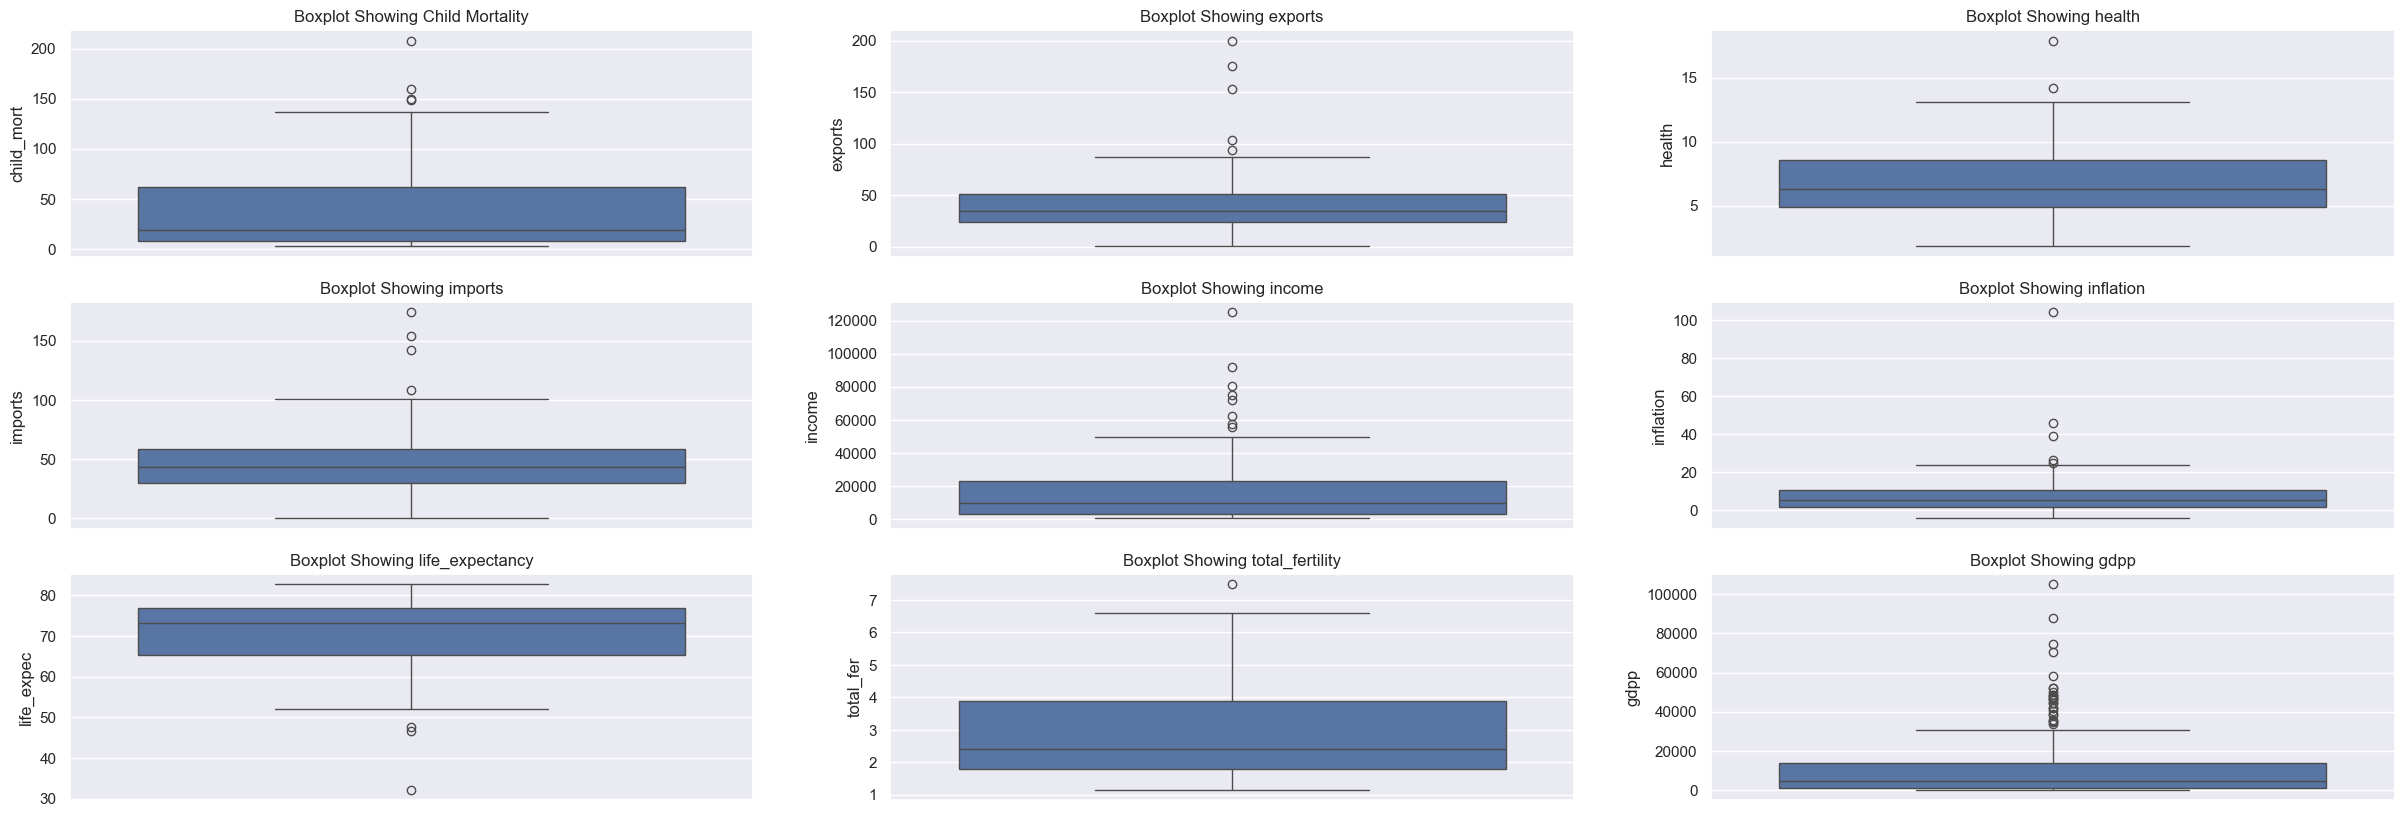

In [90]:
# Checking for outliers using boxplots

fig,axs = plt.subplots(nrows=3, ncols=3, figsize=(30,10))
sns.boxplot(y="child_mort", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot Showing Child Mortality")

sns.boxplot(y="exports", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot Showing exports")

sns.boxplot(y="health", data=df, ax=axs[0,2])
axs[0,2].set_title("Boxplot Showing health")

sns.boxplot(y="imports", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot Showing imports")

sns.boxplot(y="income", data=df, ax=axs[1,1])
axs[1,1].set_title("Boxplot Showing income")

sns.boxplot(y="inflation", data=df, ax=axs[1,2])
axs[1,2].set_title("Boxplot Showing inflation")

sns.boxplot(y="life_expec", data=df, ax=axs[2,0])
axs[2,0].set_title("Boxplot Showing life_expectancy")

sns.boxplot(y="total_fer", data=df, ax=axs[2,1])
axs[2,1].set_title("Boxplot Showing total_fertility")

sns.boxplot(y="gdpp", data=df, ax=axs[2,2])
axs[2,2].set_title("Boxplot Showing gdpp")

We can see that all the features have some levels of outliers, we will then review the data distribution for insights on how to possibly handle the outliers.
if data is mostly uniformly distributed, we'll use Min-MaxScaler.
If the distribution is normal or slightly skewed, we'll use a StandardScaler.
If its heavily skewed you want to consider a RobustScaler

## Exploratory Data Analysis

### Univariate Analysis

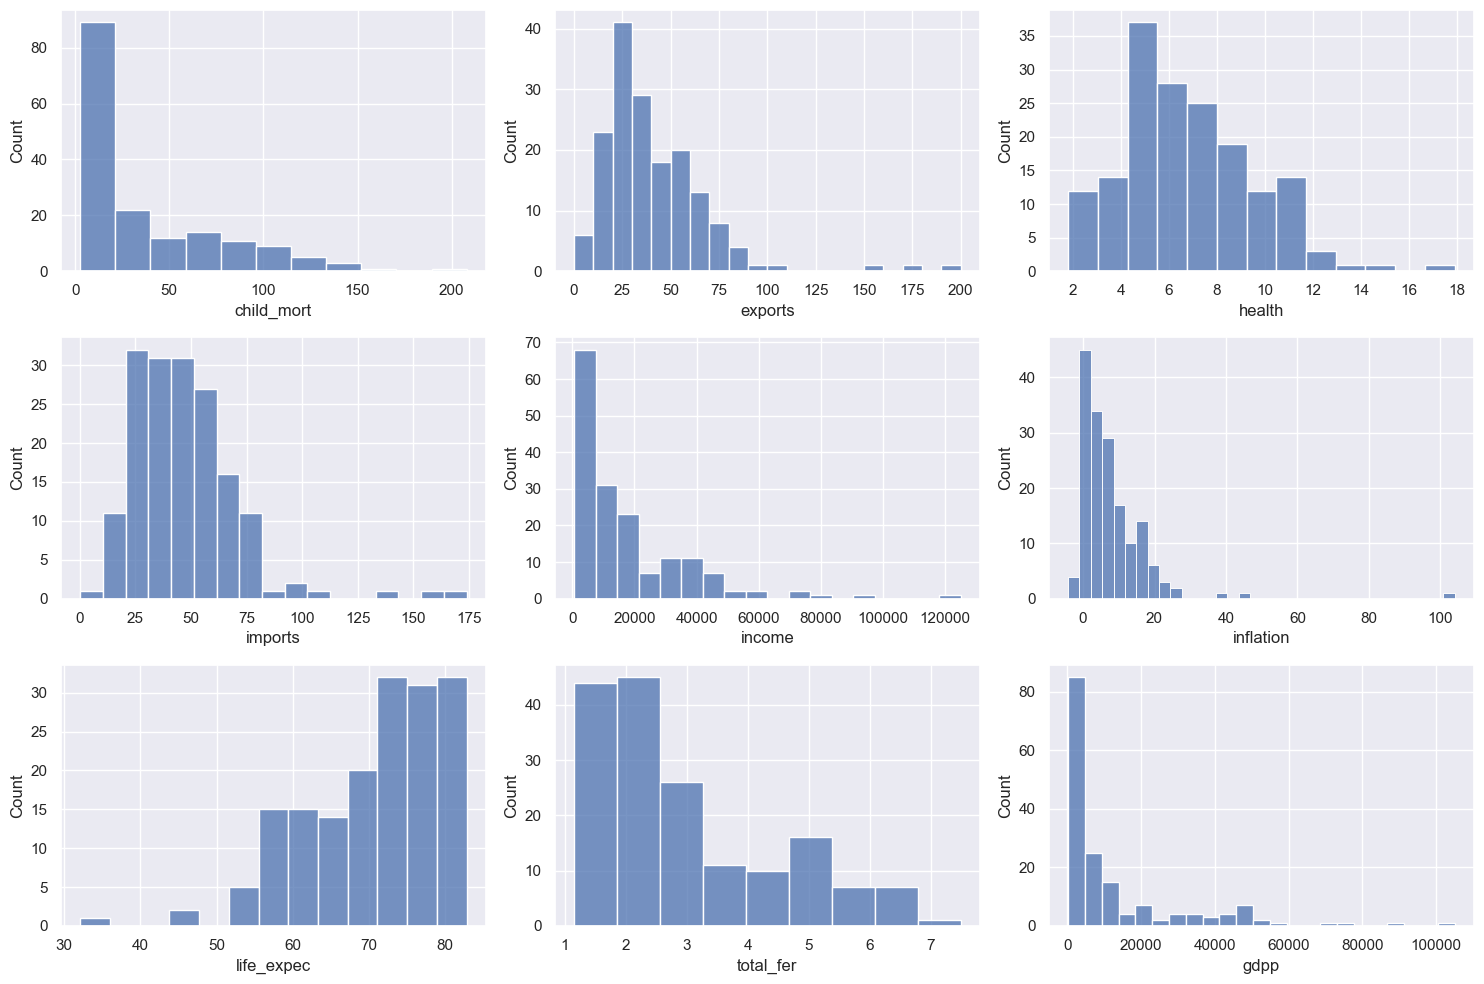

In [94]:
# Confirming the data distribution
# df.hist() or


fig, position = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])

plt.tight_layout()
plt.show();

Our data distribution is skewed to both the right and left, however looking at the data, they are different data poits and different values based on the different countries involved, looking at different GDPs and economic powers, which our aim is to group the data, hence we will not be treating this outliers as one.

In [97]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


## Bivariate Analysis

Investigating the relationship between the features

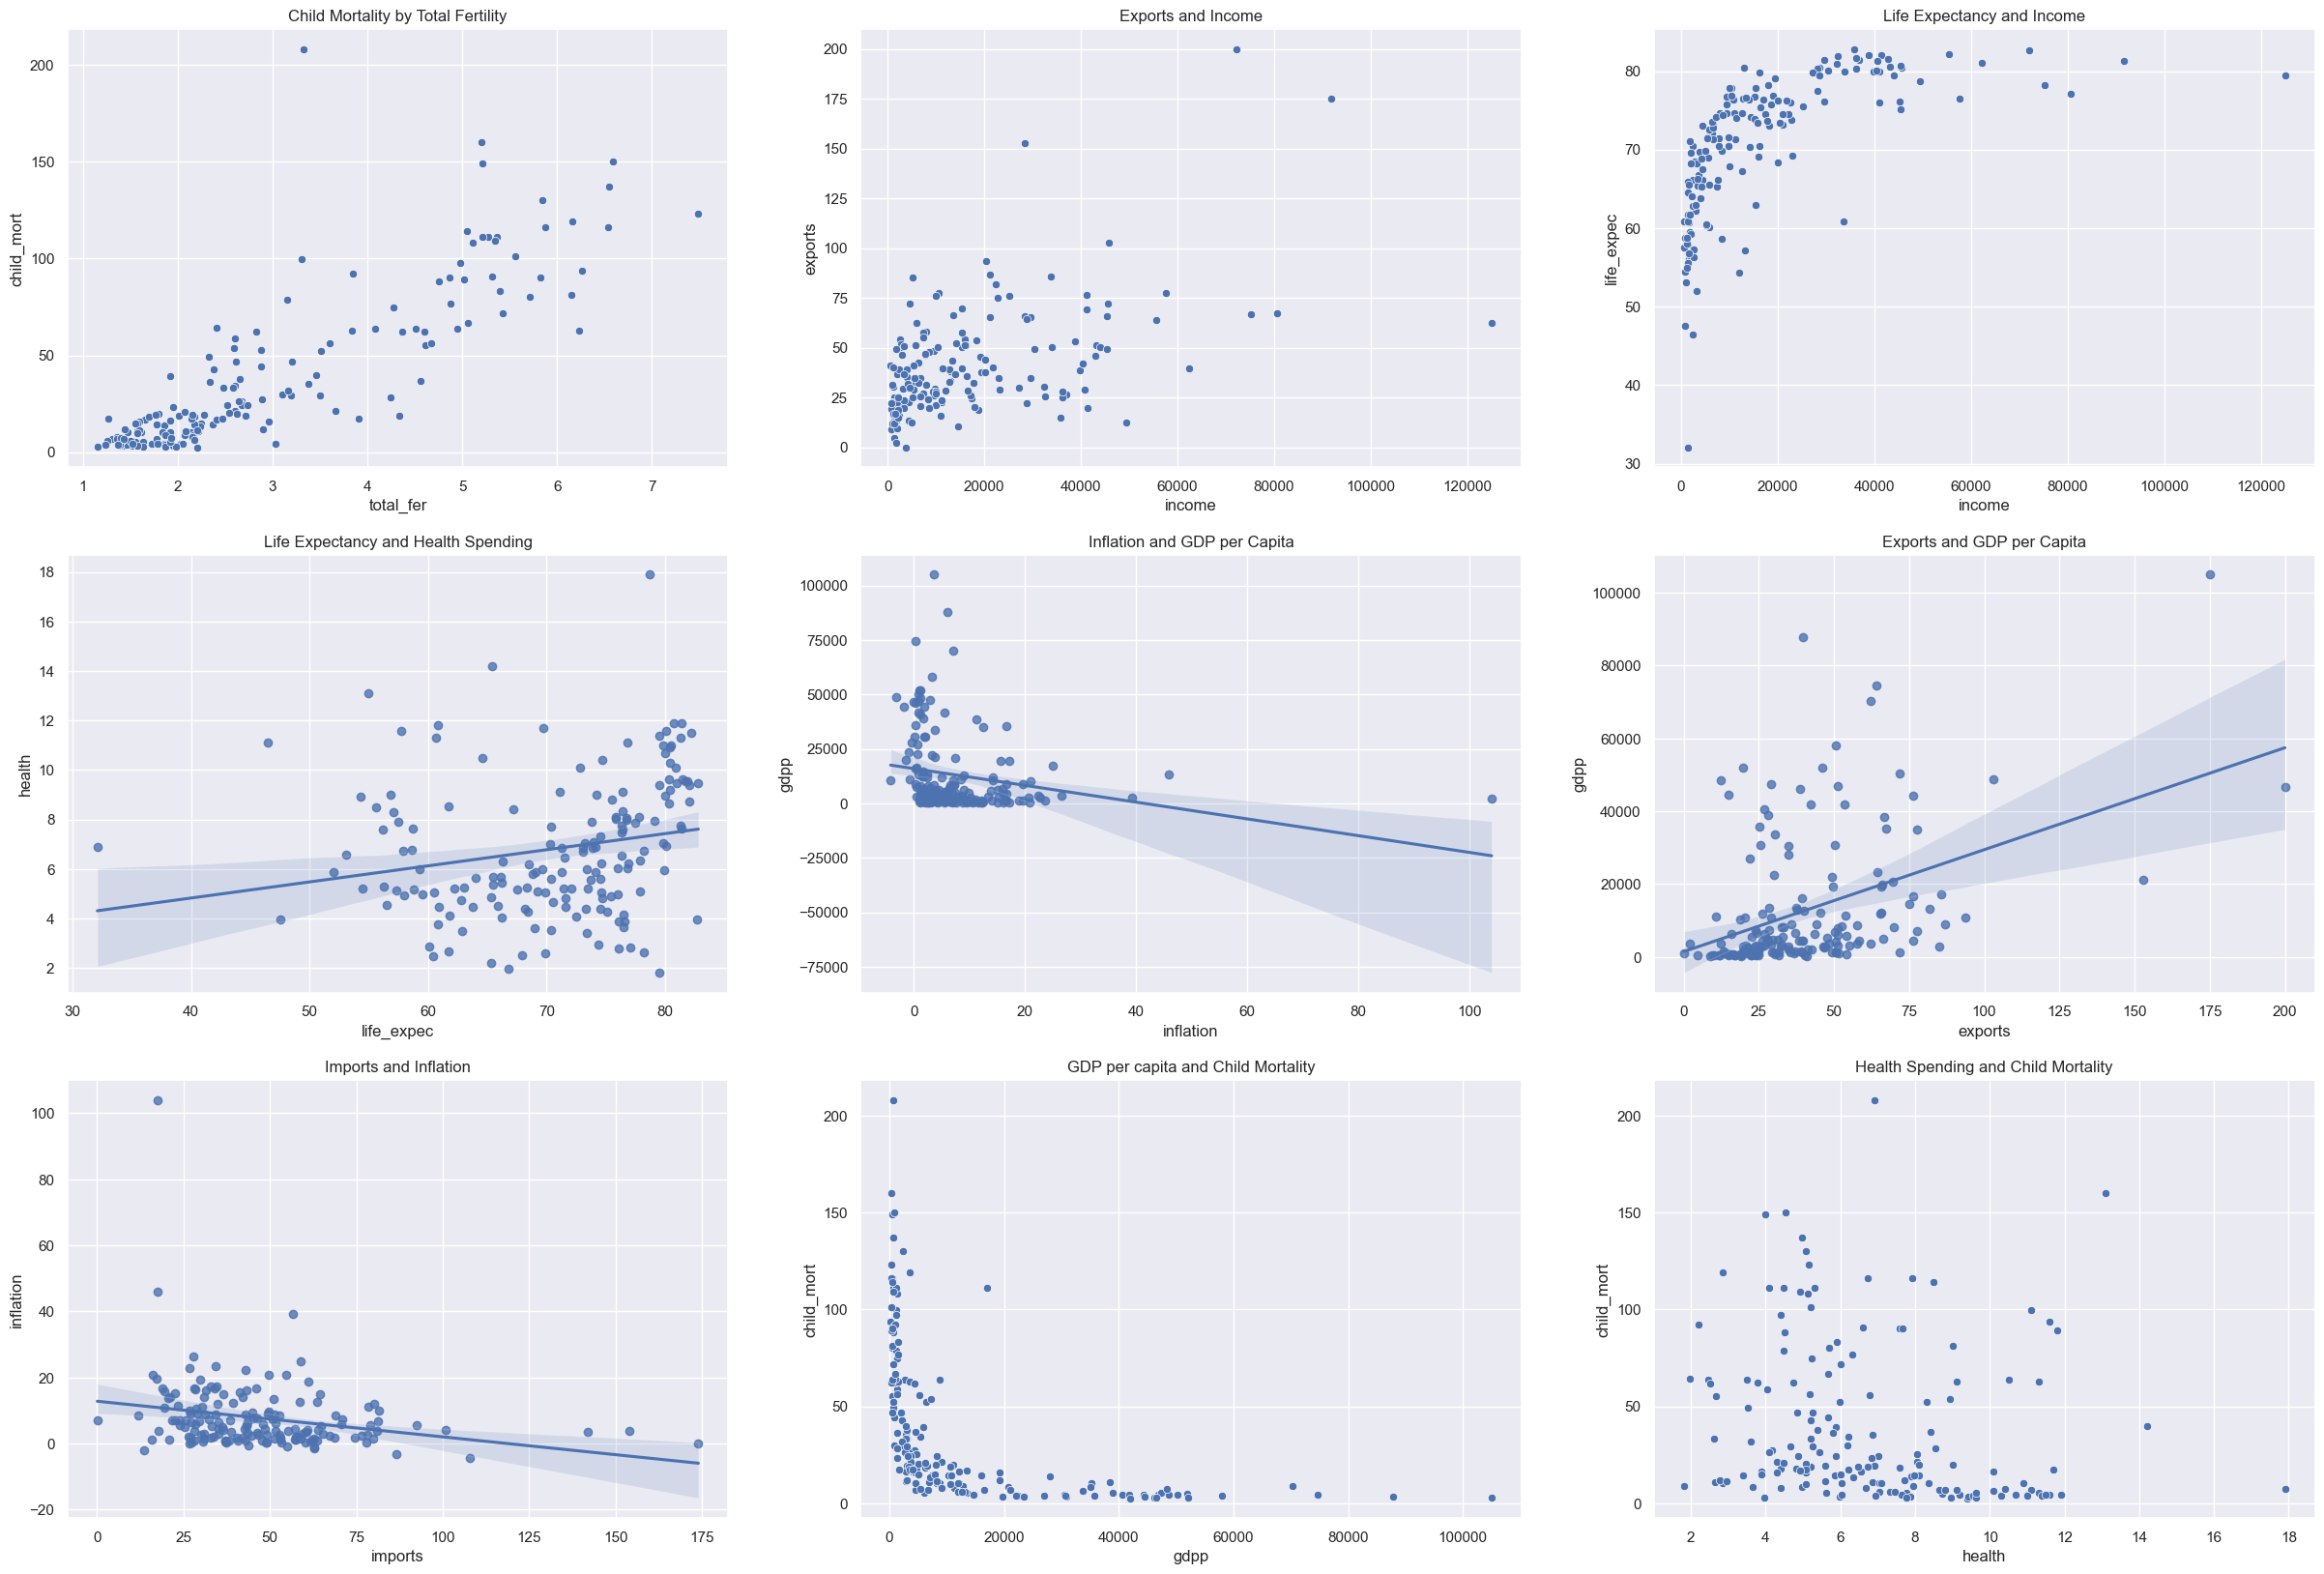

In [156]:
# Investigating if there is a relationship between Fertility and child mortality

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30,20))
sns.scatterplot(y="child_mort", data=df, x="total_fer", ax=axs[0,0])
axs[0,0].set_title("Child Mortality by Total Fertility")

# Investigating the relatioship between Exports and Income
sns.scatterplot(y="exports", data=df, x="income", ax=axs[0,1])
axs[0,1].set_title("Exports and Income")

#Investigating the relationship between Life Expectancy and Income
sns.scatterplot(y="life_expec", data=df, x="income", ax=axs[0,2])
axs[0,2].set_title("Life Expectancy and Income")

# Investigating the relationship between Health Spendings and Life Expectancy
sns.regplot(y="health", data=df, x="life_expec", ax=axs[1,0])
axs[1,0].set_title("Life Expectancy and Health Spending")

# Investigating the relationship between Inflation and GDP per Capita (gdpp)
sns.regplot(y="gdpp", data=df, x="inflation", ax=axs[1,1])
axs[1,1].set_title("Inflation and GDP per Capita")

# Investigating the relationship between Export and GDP per Capita (gdpp)
sns.regplot(y="gdpp", data=df, x="exports", ax=axs[1,2])
axs[1,2].set_title("Exports and GDP per Capita")

#Investigating the relationship between Imports and Inflation
sns.regplot(y="inflation", data=df, x="imports", ax=axs[2,0])
axs[2,0].set_title("Imports and Inflation")

# Reviewing the relationship between GDP per capita and child mortality
sns.scatterplot(y="child_mort", data=df, x="gdpp", ax=axs[2,1])
axs[2,1].set_title("GDP per capita and Child Mortality")

# Reviewing the relationship between countries and child mortality
sns.scatterplot(y="child_mort", data=df, x="health", ax=axs[2,2])
axs[2,2].set_title("Health Spending and Child Mortality");

### Inferences from each plot
Child Mortality by Total Fertility:
Indicates that higher fertility rates correspond to higher child mortality. 
    
Exports and Income:
Higher export volumes are associated with higher income levels suggesting that Countries with strong export economies generally enjoy higher incomes.

Life Expectancy and Income:
shows that life expectancy increases with income but plateaus at higher income levels. This suggests that Basic income boosts life expectancy significantly; beyond that, the impact diminishes.

Life Expectancy and Health Spending:
Shows that higher health spending tends to improve life expectancy suggesting that countries investing in health services contributes to better life outcomes.

Inflation and GDP per Capita:
Shows that higher inflation is associated with lower GDP per capita suggesting that Inflation destabilizes economies, reducing overall wealth per person.

Exports and GDP per Capita:
Clearly shows that increased exports contribute to higher GDP per capita indicating that Export-driven economies benefit from stronger growth.

Imports and Inflation:
reveals that higher imports may slightly reduce inflation levels which inturn suggests that stable imports can help balance supply and demand, reducing inflation pressures.

GDP per Capita and Child Mortality:
Clearly shows that higher GDP per capita significantly reduces child mortality indicting that Wealthier nations can afford better healthcare and reduce child deaths.

Health Spending and Child Mortality:
There's no strong trend but suggests that higher health spending may reduce child mortality.


## Reviewing Child Mortality by Country

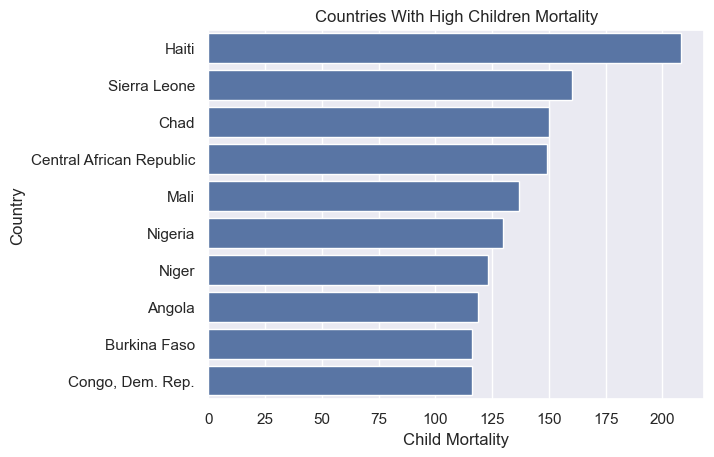

In [187]:
top_ten_child_mort = df.sort_values(by='child_mort', ascending=False)[:10]

sns.barplot(x="child_mort", data=top_ten_child_mort, y="country")
plt.xlabel("Child Mortality")
plt.ylabel("Country")
plt.title("Countries With High Children Mortality");


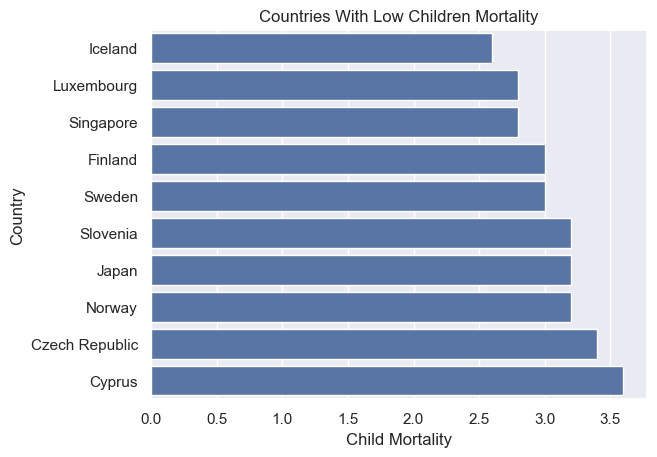

In [189]:
least_ten_child_mort = df.sort_values(by='child_mort')[:10]
sns.barplot(x="child_mort", data=least_ten_child_mort, y="country")
plt.title("Countries With Low Children Mortality")
plt.xlabel("Child Mortality")
plt.ylabel("Country");

In [161]:
df.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


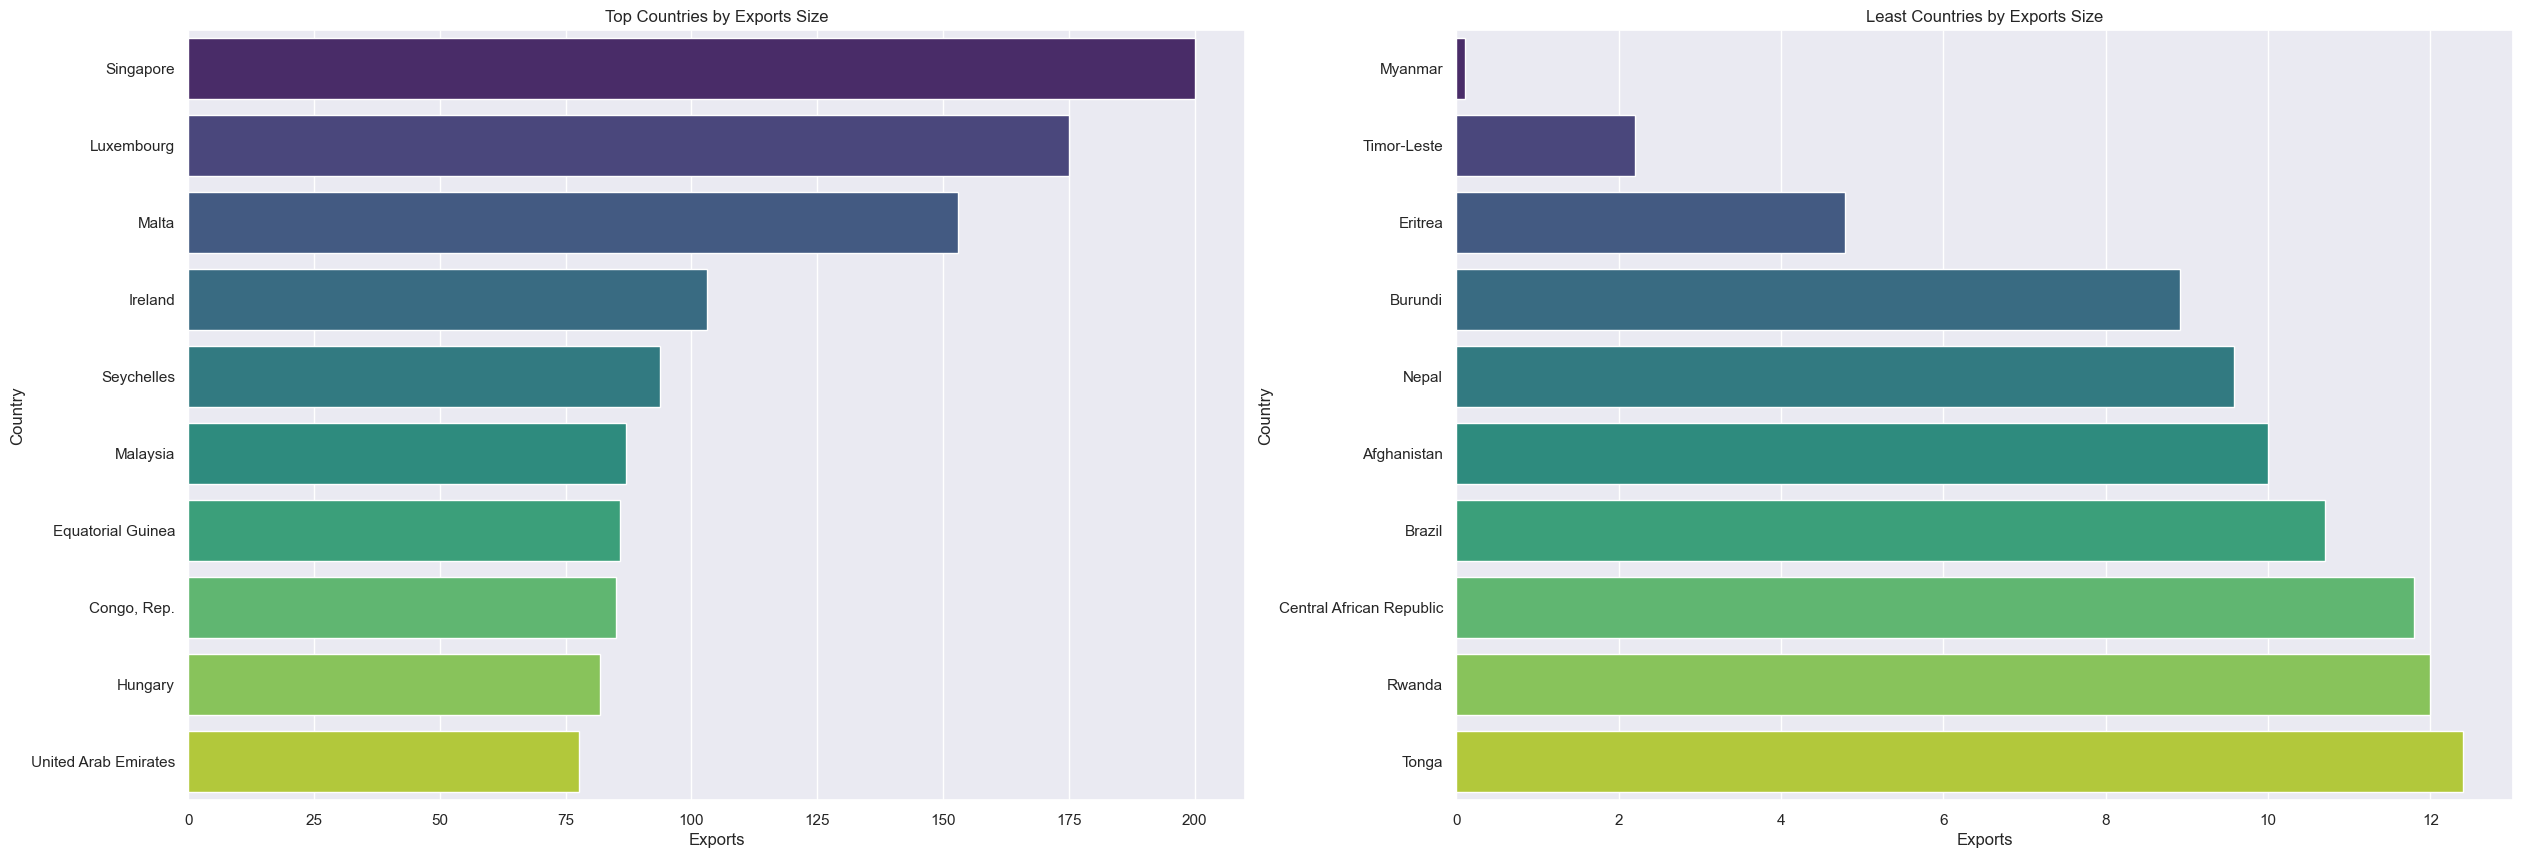

In [299]:
# Investigating the relatioship between Exports and Country

top_ten_exports = df.sort_values(by='exports',  ascending=False)[:10]
least_ten_exports = df.sort_values(by='exports')[:10]

plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
sns.barplot(x="exports", data=top_ten_exports, y="country", orient='h', palette='viridis')
plt.title("Top Countries by Exports Size")
plt.ylabel("Country")
plt.xlabel("Exports")

plt.subplot(1,2,2)
sns.barplot(x="exports", data=least_ten_exports, y="country", orient='h', palette='viridis')
plt.title("Least Countries by Exports Size")
plt.xlabel("Exports")
plt.ylabel("Country");


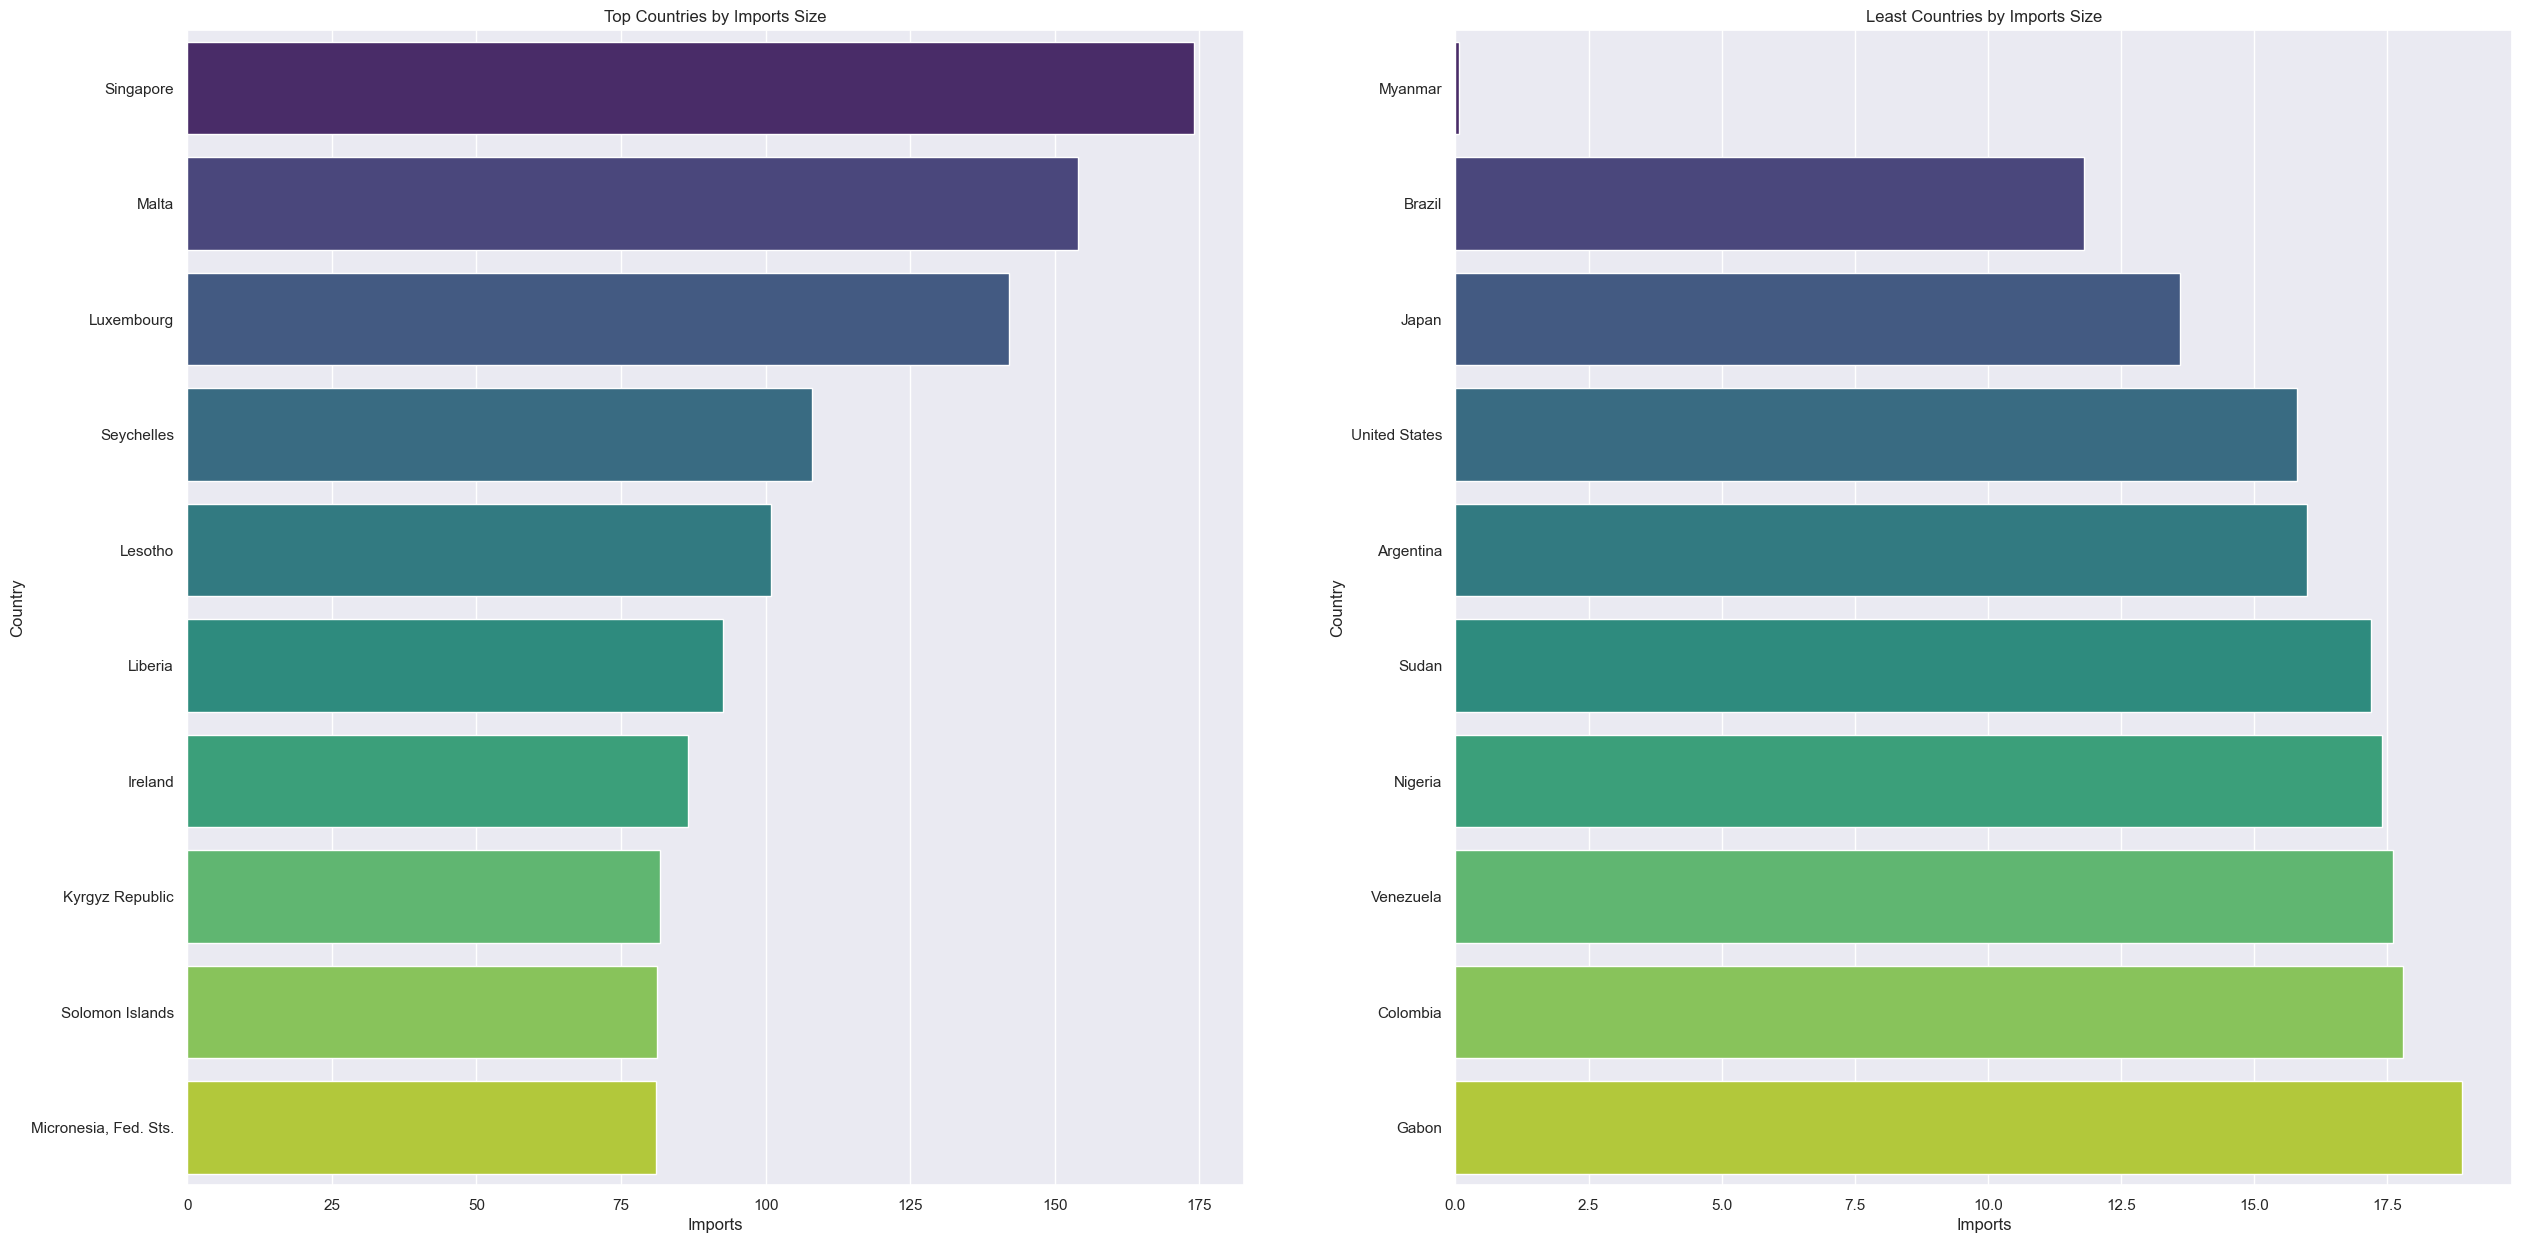

In [295]:
# Investigating the relatioship between Imports and Country

top_ten_imports = df.sort_values(by='imports',  ascending=False)[:10]
least_ten_imports = df.sort_values(by='imports')[:10]

plt.figure(figsize=(30, 15))
plt.subplot(1,2,1)
sns.barplot(x="imports", data=top_ten_imports, y="country", orient='h', palette='viridis')
plt.title("Top Countries by Imports Size")
plt.ylabel("Country")
plt.xlabel("Imports")

plt.subplot(1,2,2)
sns.barplot(x="imports", data=least_ten_imports, y="country", orient='h', palette='viridis')
plt.title("Least Countries by Imports Size")
plt.xlabel("Imports")
plt.ylabel("Country");


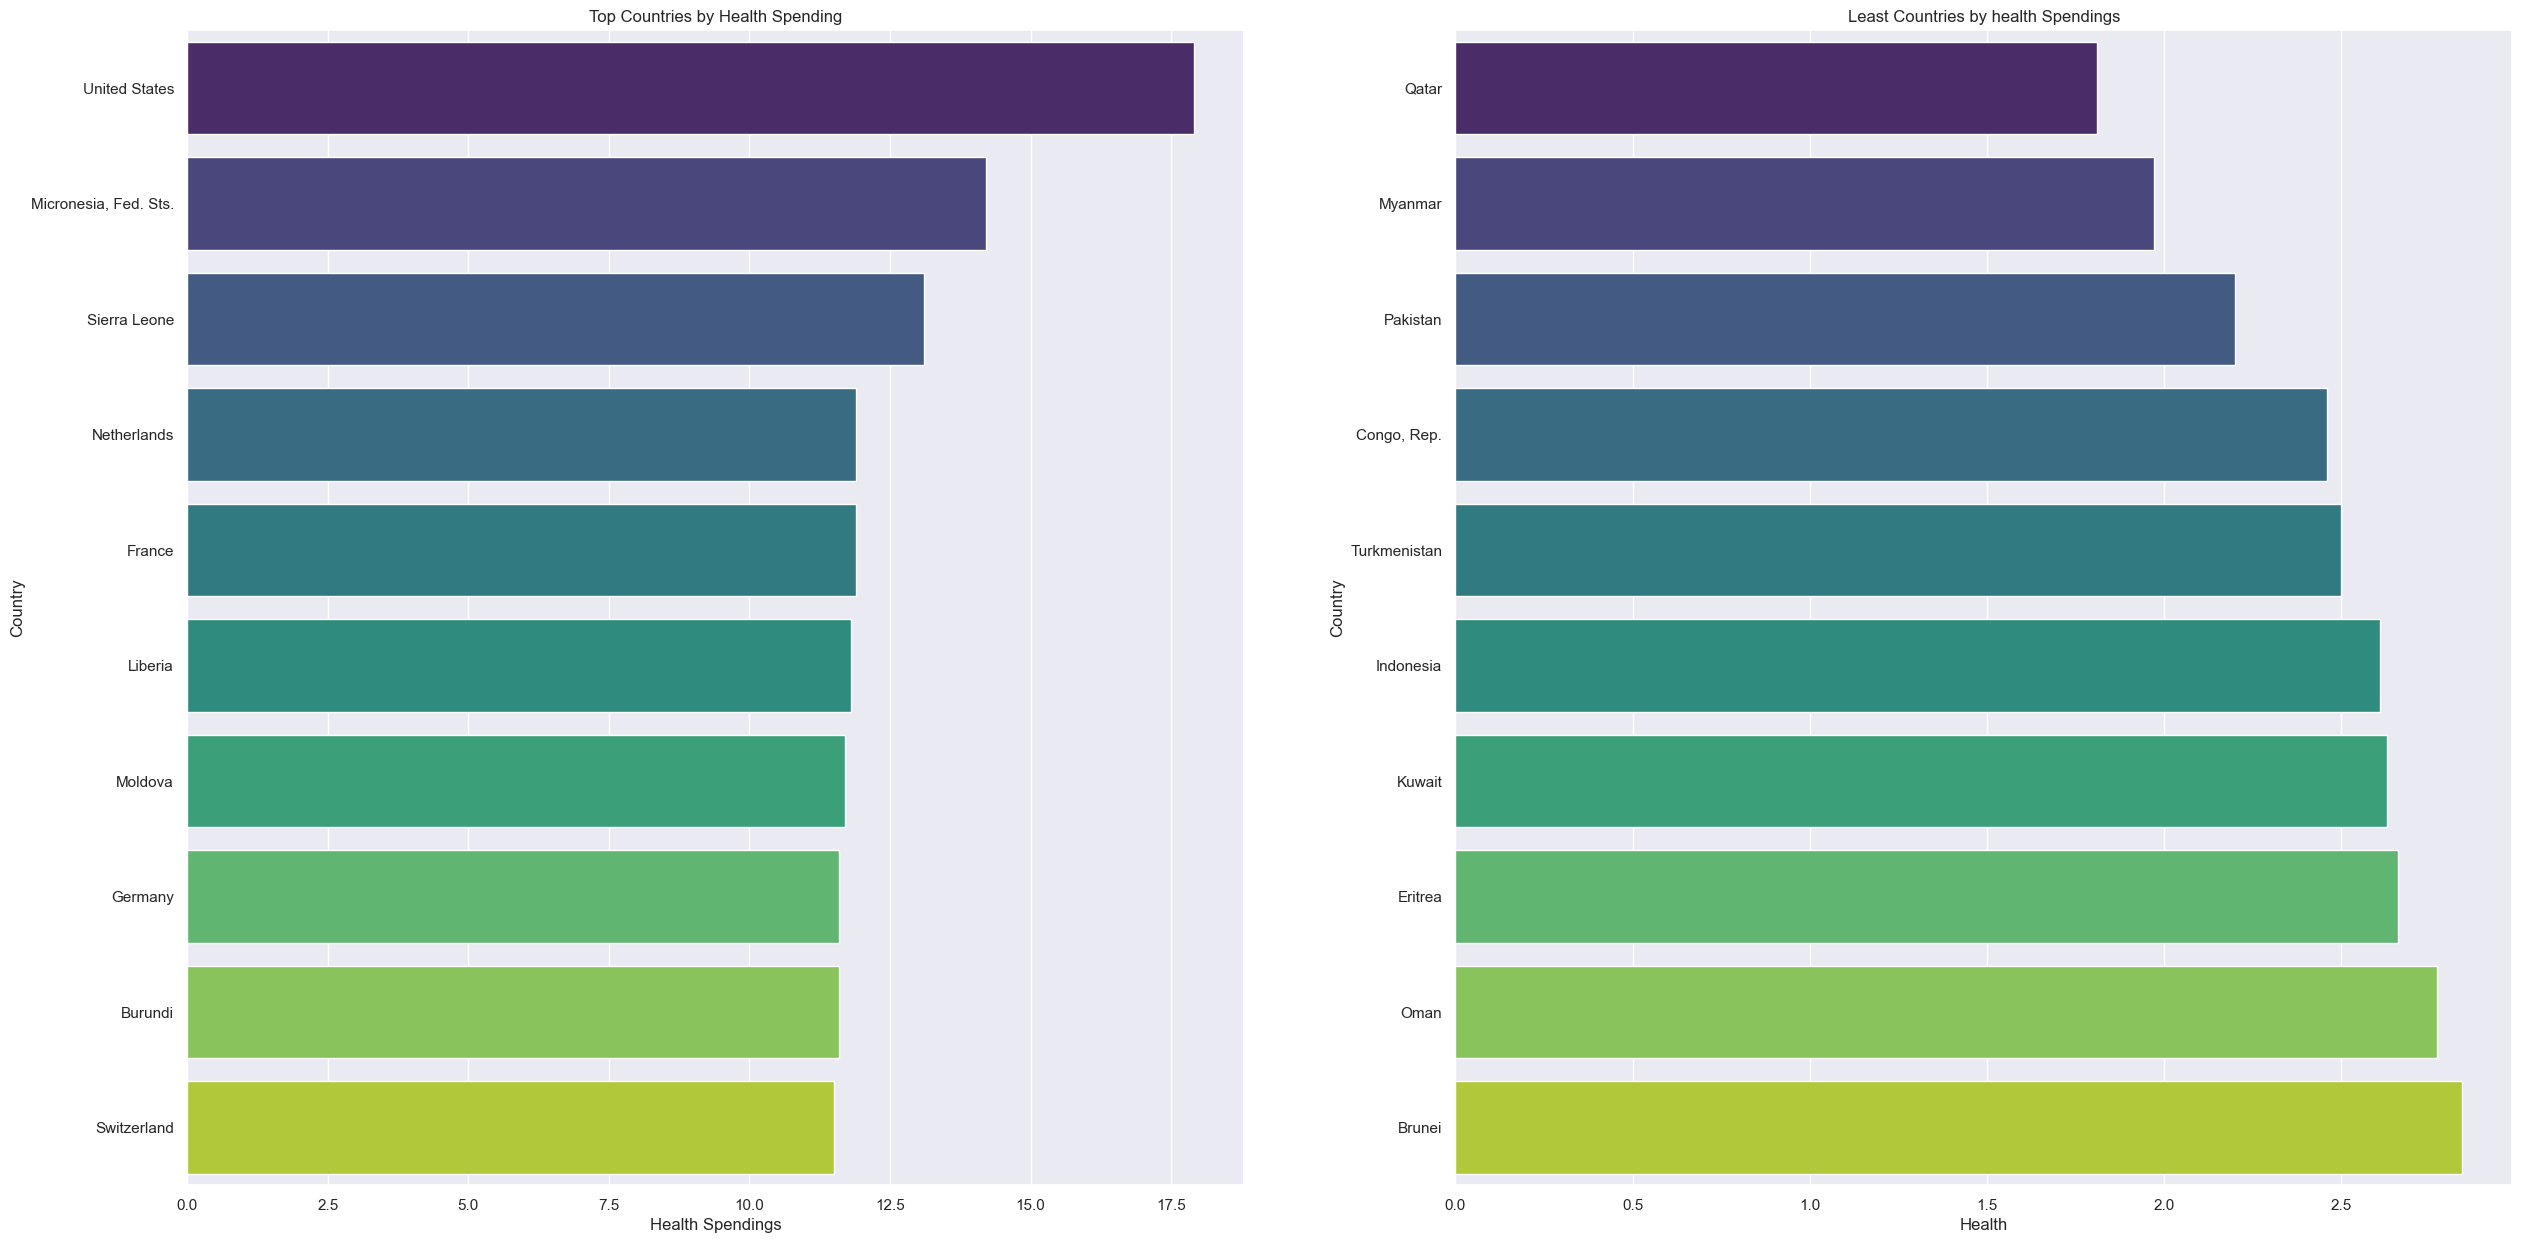

In [297]:
# Investigating the Countries with Highest and Lowest Health Spending Rate

top_ten_health = df.sort_values(by='health',  ascending=False)[:10]
least_ten_health = df.sort_values(by='health')[:10]


plt.figure(figsize=(30, 15))
plt.subplot(1,2,1)
sns.barplot(x="health", data=top_ten_health, y="country", orient='h', palette='viridis')
plt.title("Top Countries by Health Spending")
plt.ylabel("Country")
plt.xlabel("Health Spendings")

plt.subplot(1,2,2)
sns.barplot(x="health", data=least_ten_health, y="country", orient='h', palette='viridis')
plt.title("Least Countries by health Spendings")
plt.xlabel("Health")
plt.ylabel("Country");

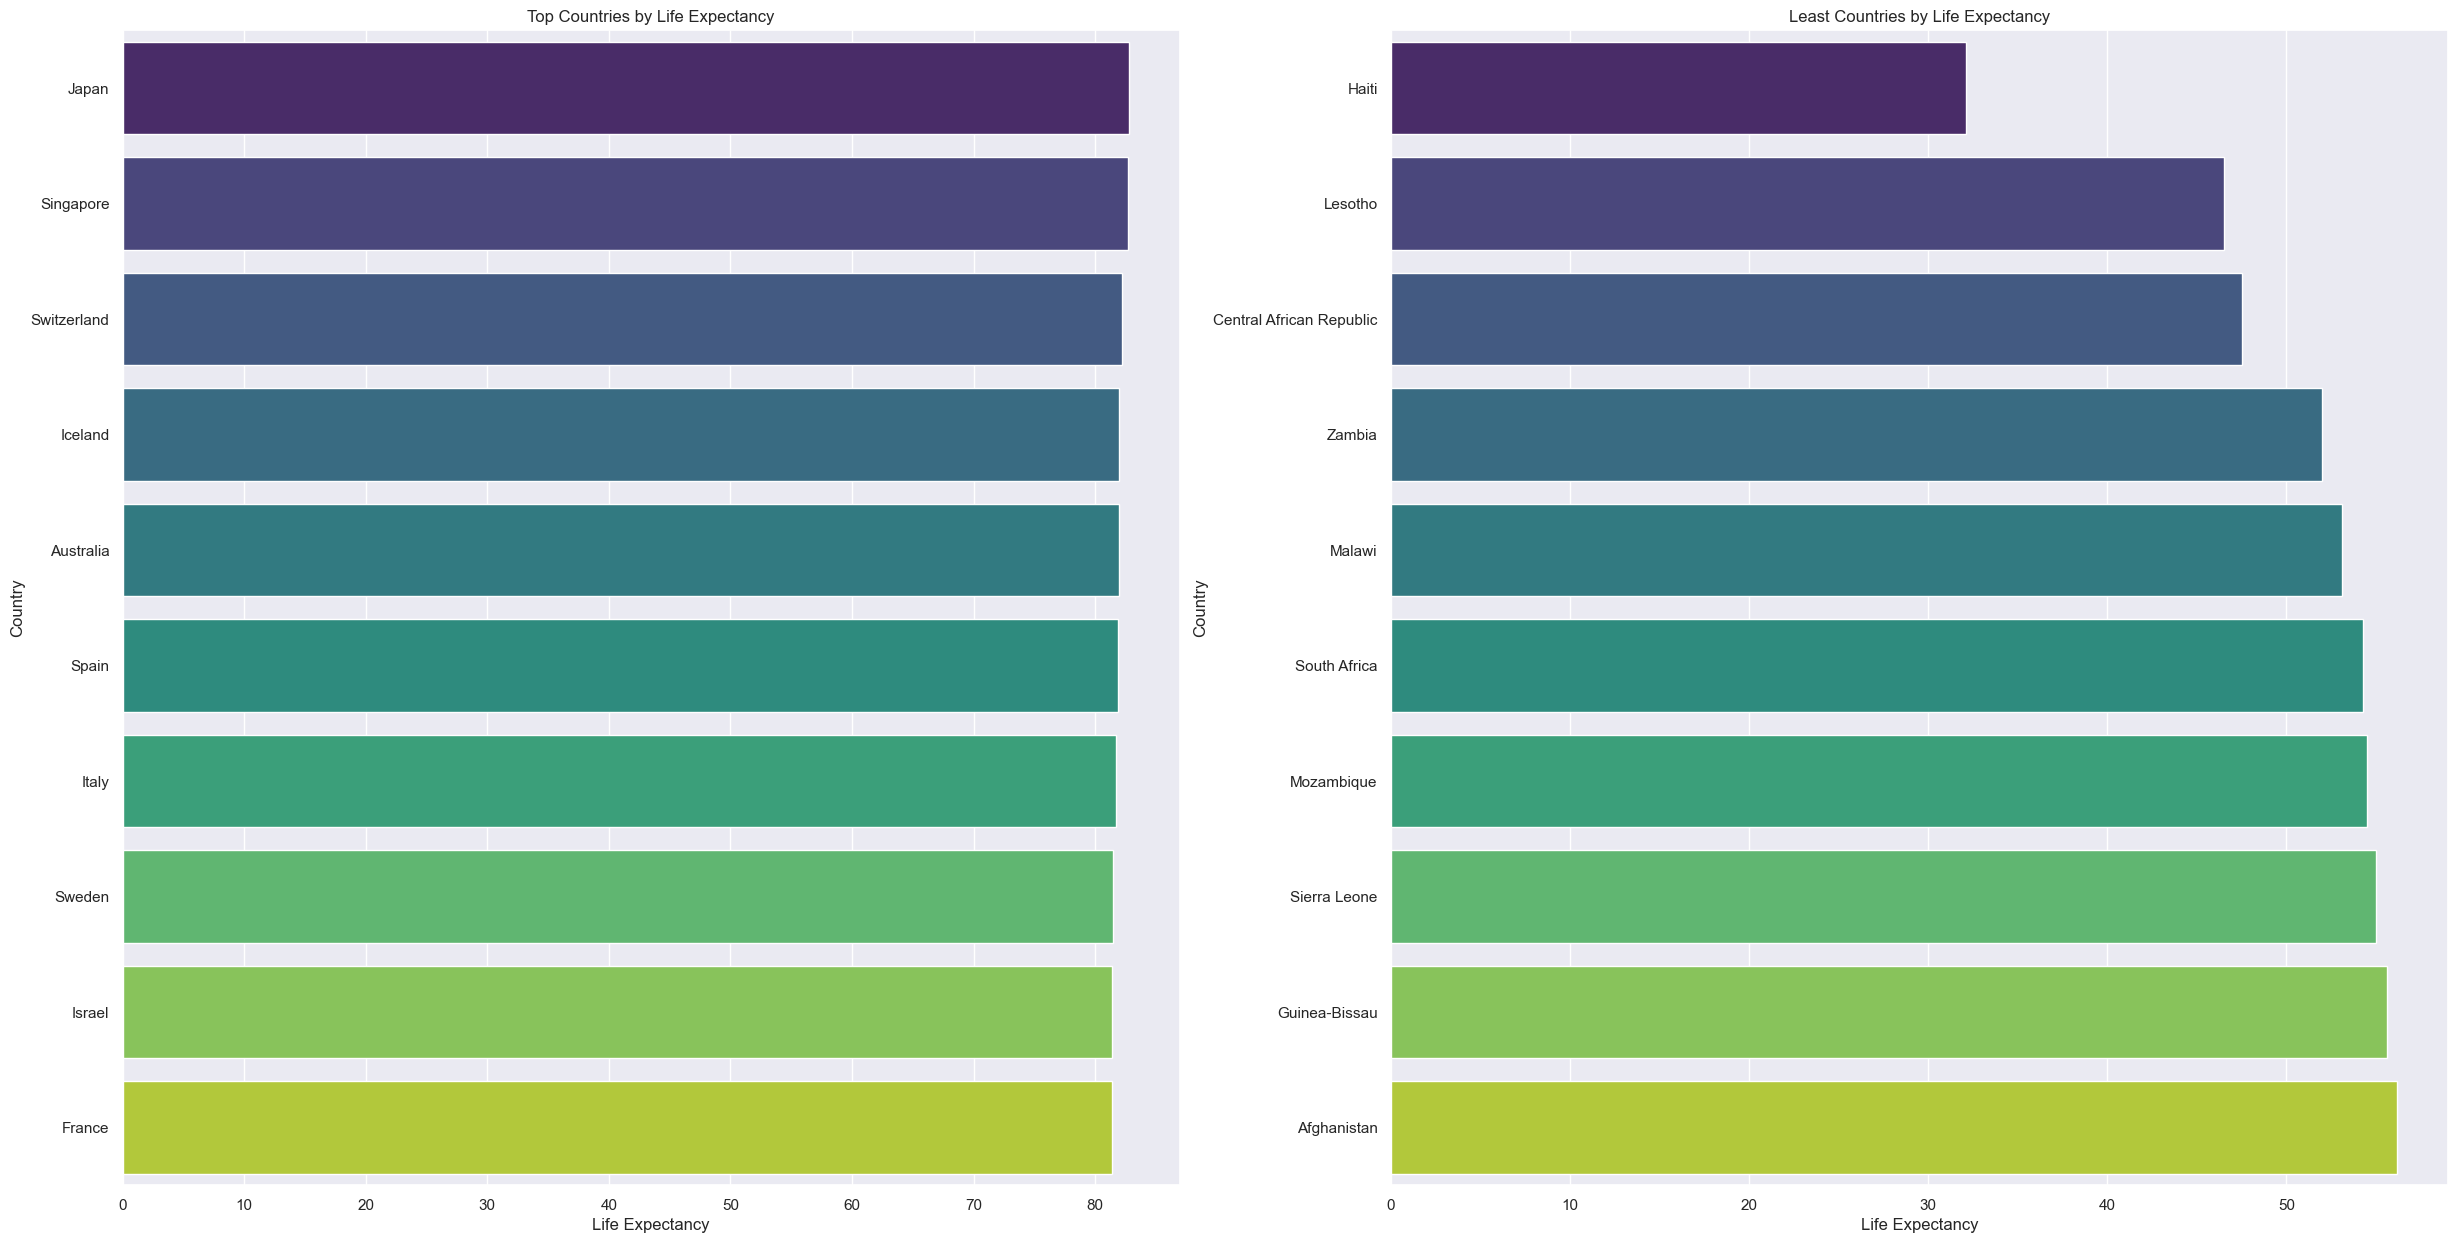

In [287]:
# Investigating the Countries with high and low Life Expectancy

top_ten_life_expec = df.sort_values(by='life_expec',  ascending=False)[:10]
least_ten_life_expec = df.sort_values(by='life_expec')[:10]


plt.figure(figsize=(30, 15))
plt.subplot(1,2,1)
sns.barplot(x="life_expec", data=top_ten_life_expec, y="country", orient='h', palette='viridis')
plt.title("Top Countries by Life Expectancy")
plt.ylabel("Country")
plt.xlabel("Life Expectancy")

plt.subplot(1,2,2)
sns.barplot(x="life_expec", data=least_ten_life_expec, y="country", orient='h', palette='viridis')
plt.title("Least Countries by Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Country");

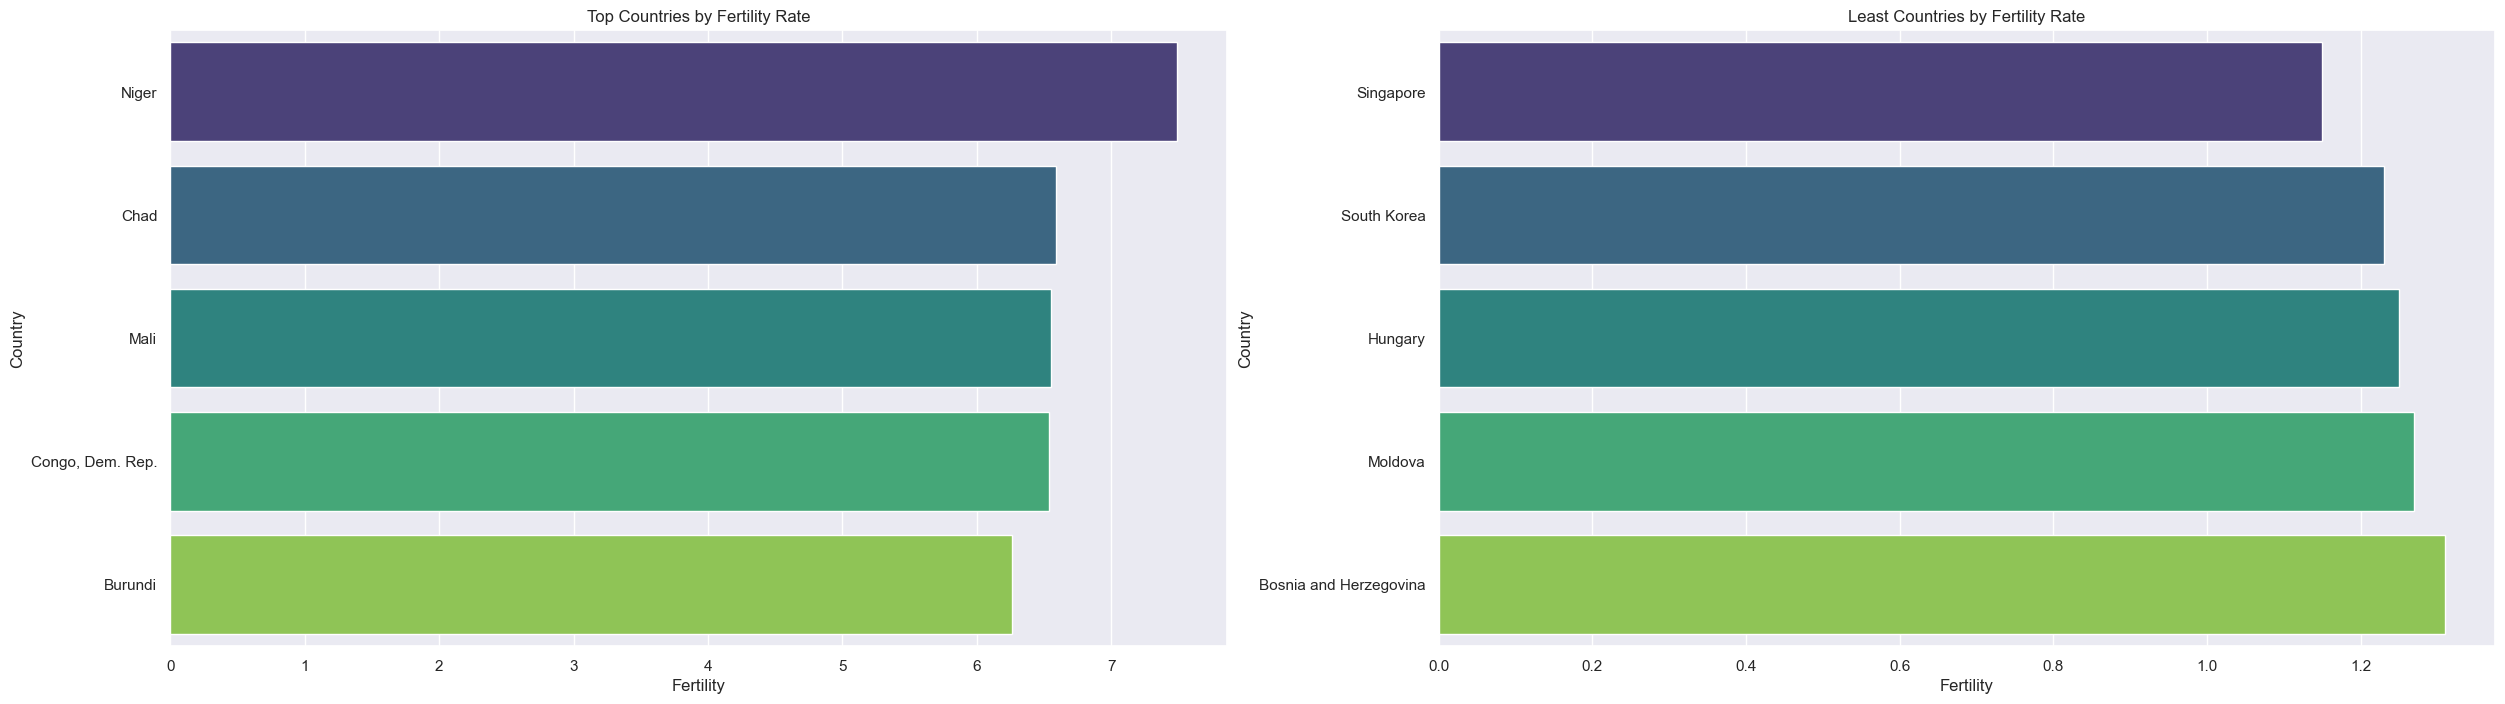

In [285]:
# Investigating the highest and lowest relationship between Fertility Rate and Country

top_five_fertility = df.sort_values(by='total_fer',  ascending=False)[:5]
least_five_fertility = df.sort_values(by='total_fer')[:5]

plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.barplot(x="total_fer", data=top_five_fertility, y="country", orient='h', palette='viridis')
plt.title("Top Countries by Fertility Rate")
plt.ylabel("Country")
plt.xlabel("Fertility")

plt.subplot(1,2,2)
sns.barplot(x="total_fer", data=least_five_fertility, y="country", orient='h', palette='viridis')
plt.title("Least Countries by Fertility Rate")
plt.xlabel("Fertility")
plt.ylabel("Country");

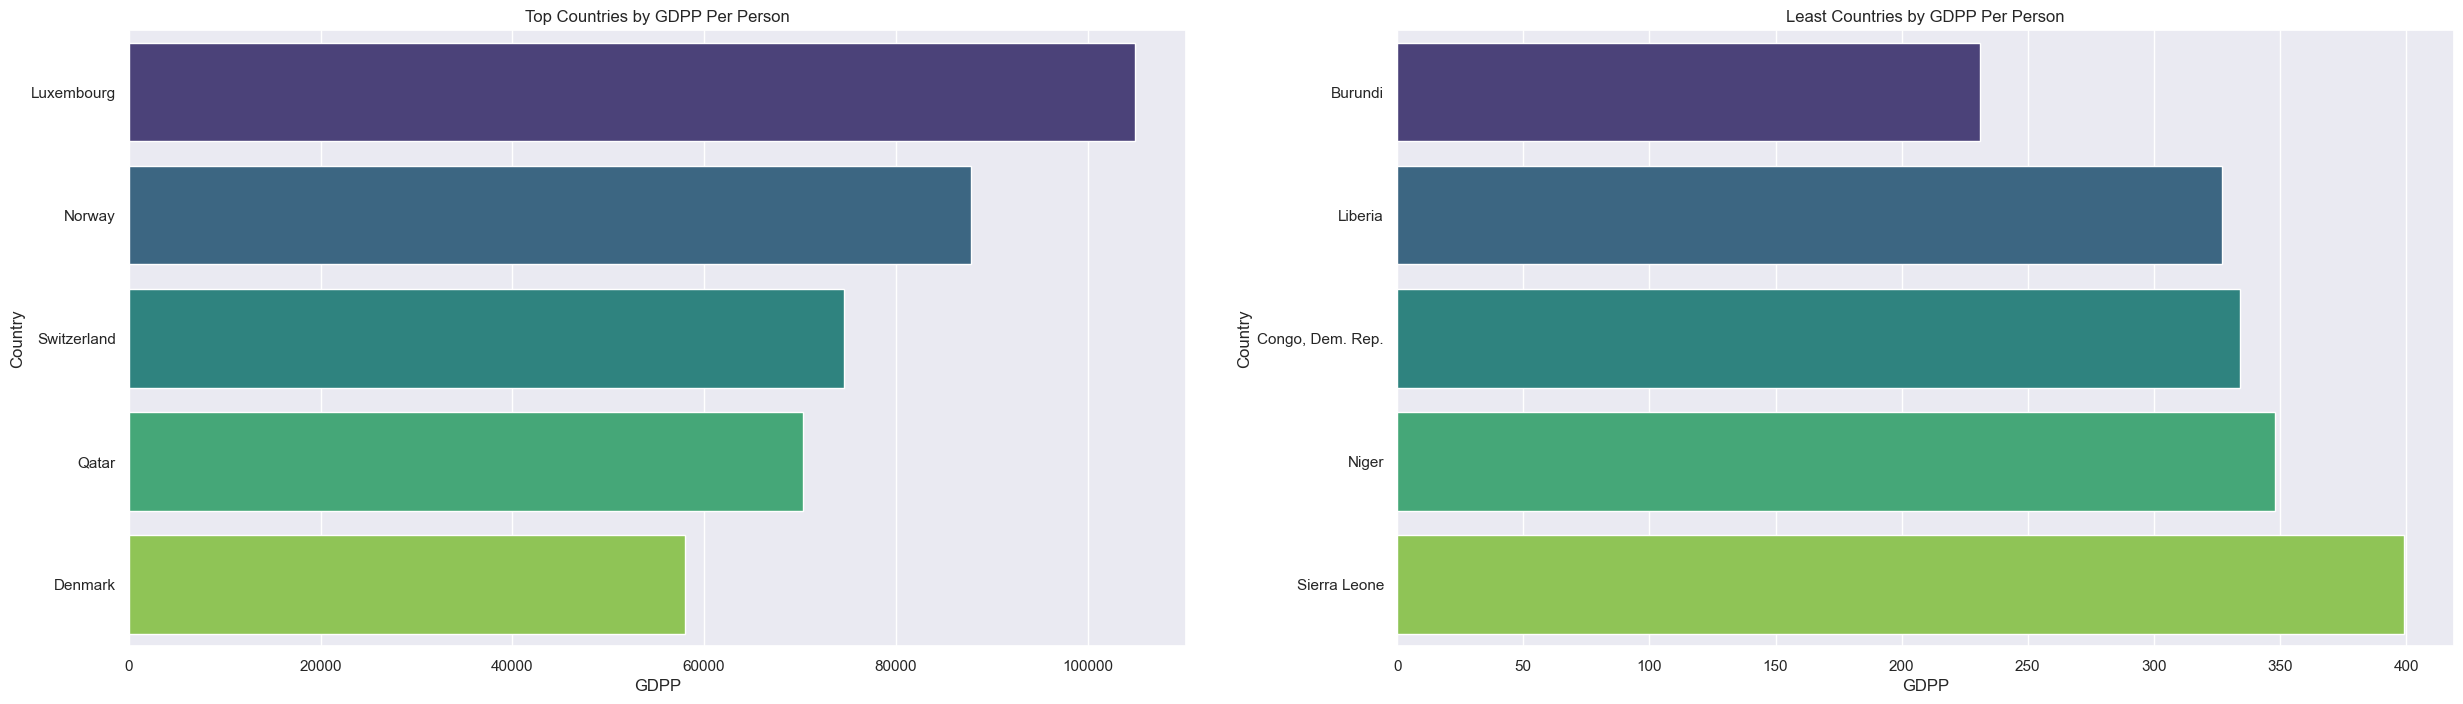

In [291]:
# Investigating Top and Least Countries and their GDP Contribution per Person levels

top_five_gdpp = df.sort_values(by='gdpp',  ascending=False)[:5]
least_five_gdpp = df.sort_values(by='gdpp')[:5]

plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.barplot(x="gdpp", data=top_five_gdpp, y="country", orient='h', palette='viridis')
plt.title("Top Countries by GDPP Per Person")
plt.ylabel("Country")
plt.xlabel("GDPP")

plt.subplot(1,2,2)
sns.barplot(x="gdpp", data=least_five_gdpp, y="country", orient='h', palette='viridis')
plt.title("Least Countries by GDPP Per Person")
plt.xlabel("GDPP")
plt.ylabel("Country");

## Multivariate Analysis

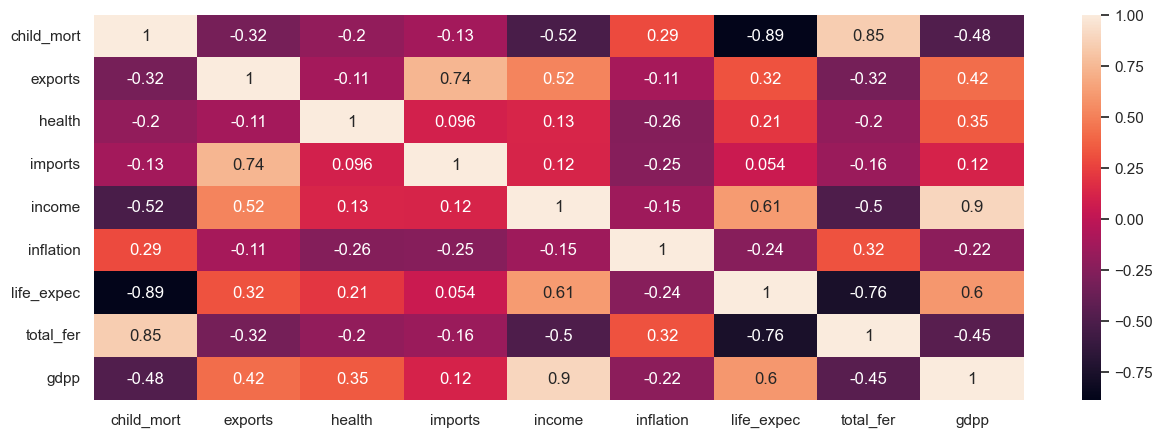

In [307]:
a= df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(15,5))
sns.heatmap(a, annot=True)
plt.show()

There's a strong poitive correllation between income and GDPP, Fertility rate and Child mortality, income and life expectancy, import and exports.
Thers's also a strong negative correllation between life expectancy and fertility, life expectancy and child mortality.

## Feature Engineering